Importing Libraries

In [84]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error  # RMSE calculation
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV  # Grid hyperparameter search

import xgboost as xgb

import joblib  # Model saving/loading

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

EDA

In [85]:
data = pd.read_excel('kaggle-EGF.xlsx')

In [86]:
data.head()

Date  CPI National Year on Year Inflation  Advances by banks  \
0 2012-01-01                            10.108950            3492649   
1 2012-02-01                            11.156968            3567035   
2 2012-03-01                            10.842391            3606844   
3 2012-04-01                            11.256580            3602125   
4 2012-05-01                            12.290578            3626809   

   Auto Sales  Consumer Confidence Index  Call Money Rate (End of Period)  \
0       15722                     29.480                            10.90   
1       24172                     29.935                            11.52   
2       23286                     30.390                            11.27   
3       21337                     29.175                            11.33   
4       23713                     27.960                            10.85   

   IMF Commodity Prices  National Consumer Price Index  \
0                136.29                          79.84   
1                140.04                          80.80   
2                140.11                          81.58   
3                139.73                          82.43   
4                134.00                          83.78   

   Credit to the Private Sector  Deposits of Banks  ...  \
0                    3017343.29            5682167  ...   
1                    2973088.24            5716810  ...   
2                    2959743.01            5920093  ...   
3                    2966975.64            5935537  ...   
4                    2924350.78            6021033  ...   

   KIBOR 1 Year Interest Rate  KIBOR 6 months Interest Rate  \
0                       11.75                         11.65   
1                       11.74                         11.65   
2                       11.81                         11.70   
3                       11.85                         11.75   
4                       11.87                         11.76   

   Karachi Stock Exchange All Shares Index  Lending Rate  \
0                                  8225.97          5.88   
1                                  8946.64          5.85   
2                                  9649.95          5.74   
3                                  9812.71          5.76   
4                                  9714.33          5.88   

   International Oil Prices  SBP Policy Rate  Public Sector Borrowing  \
0                    106.71             12.0                3402132.3   
1                    112.71             12.0                3496690.9   
2                    117.83             12.0                3534390.5   
3                    113.76             12.0                3602892.8   
4                    104.34             12.0                3691756.4   

   Real Output - Quantum Index of Large-Scale Manufacturing Industries  \
0                                          87.502708                     
1                                          87.634954                     
2                                          87.735341                     
3                                          87.883433                     
4                                          88.100621                     

   Real Effective Exchange Rate  Weighted Average Overnight Repo Rate   
0                      104.7421                              10.983810  
1                      102.9416                              11.652252  
2                      104.0896                              11.255238  
3                      105.7597                              11.309048  
4                      107.3915                              11.110455  

[5 rows x 25 columns]

In [87]:
data.columns

Index(['Date', 'CPI National Year on Year Inflation', 'Advances by banks',
       'Auto Sales', 'Consumer Confidence Index',
       'Call Money Rate (End of Period)', 'IMF Commodity Prices',
       'National Consumer Price Index', 'Credit to the Private Sector',
       'Deposits of Banks', 'Deposit Rate',
       'Pakistani Rupee to US Dollar Nominal Exchange Rate',
       'Economic Policy Uncertainty', 'Fertilizers Sales',
       'Karachi Stock Exchange 100 Index', 'KIBOR 1 Year Interest Rate',
       'KIBOR 6 months Interest Rate',
       'Karachi Stock Exchange All Shares Index', 'Lending Rate',
       'International Oil Prices', 'SBP Policy Rate',
       'Public Sector Borrowing',
       'Real Output - Quantum Index of Large-Scale Manufacturing Industries',
       'Real Effective Exchange Rate',
       'Weighted Average Overnight Repo Rate '],
      dtype='object')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 25 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Date                                                                 142 non-null    datetime64[ns]
 1   CPI National Year on Year Inflation                                  142 non-null    float64       
 2   Advances by banks                                                    142 non-null    int64         
 3   Auto Sales                                                           142 non-null    int64         
 4   Consumer Confidence Index                                            142 non-null    float64       
 5   Call Money Rate (End of Period)                                      142 non-null    float64       
 6   IMF Commodity Prices                              

Pre-transformation Plots

In [89]:
# Specifying columns for plotting to avoid redundancy in later plots
columns_to_plot = ['CPI National Year on Year Inflation', 'Advances by banks',
                   'Auto Sales', 'Consumer Confidence Index',
                   'Call Money Rate (End of Period)', 'IMF Commodity Prices',
                   'National Consumer Price Index', 'Credit to the Private Sector',
                   'Deposits of Banks', 'Deposit Rate',
                   'Pakistani Rupee to US Dollar Nominal Exchange Rate',
                   'Economic Policy Uncertainty', 'Fertilizers Sales',
                   'Karachi Stock Exchange 100 Index', 'KIBOR 1 Year Interest Rate',
                   'KIBOR 6 months Interest Rate', 'Karachi Stock Exchange All Shares Index',
                   'Lending Rate', 'International Oil Prices', 'SBP Policy Rate',
                   'Public Sector Borrowing', 'Real Output - Quantum Index of Large-Scale Manufacturing Industries',
                   'Real Effective Exchange Rate', 'Weighted Average Overnight Repo Rate ']

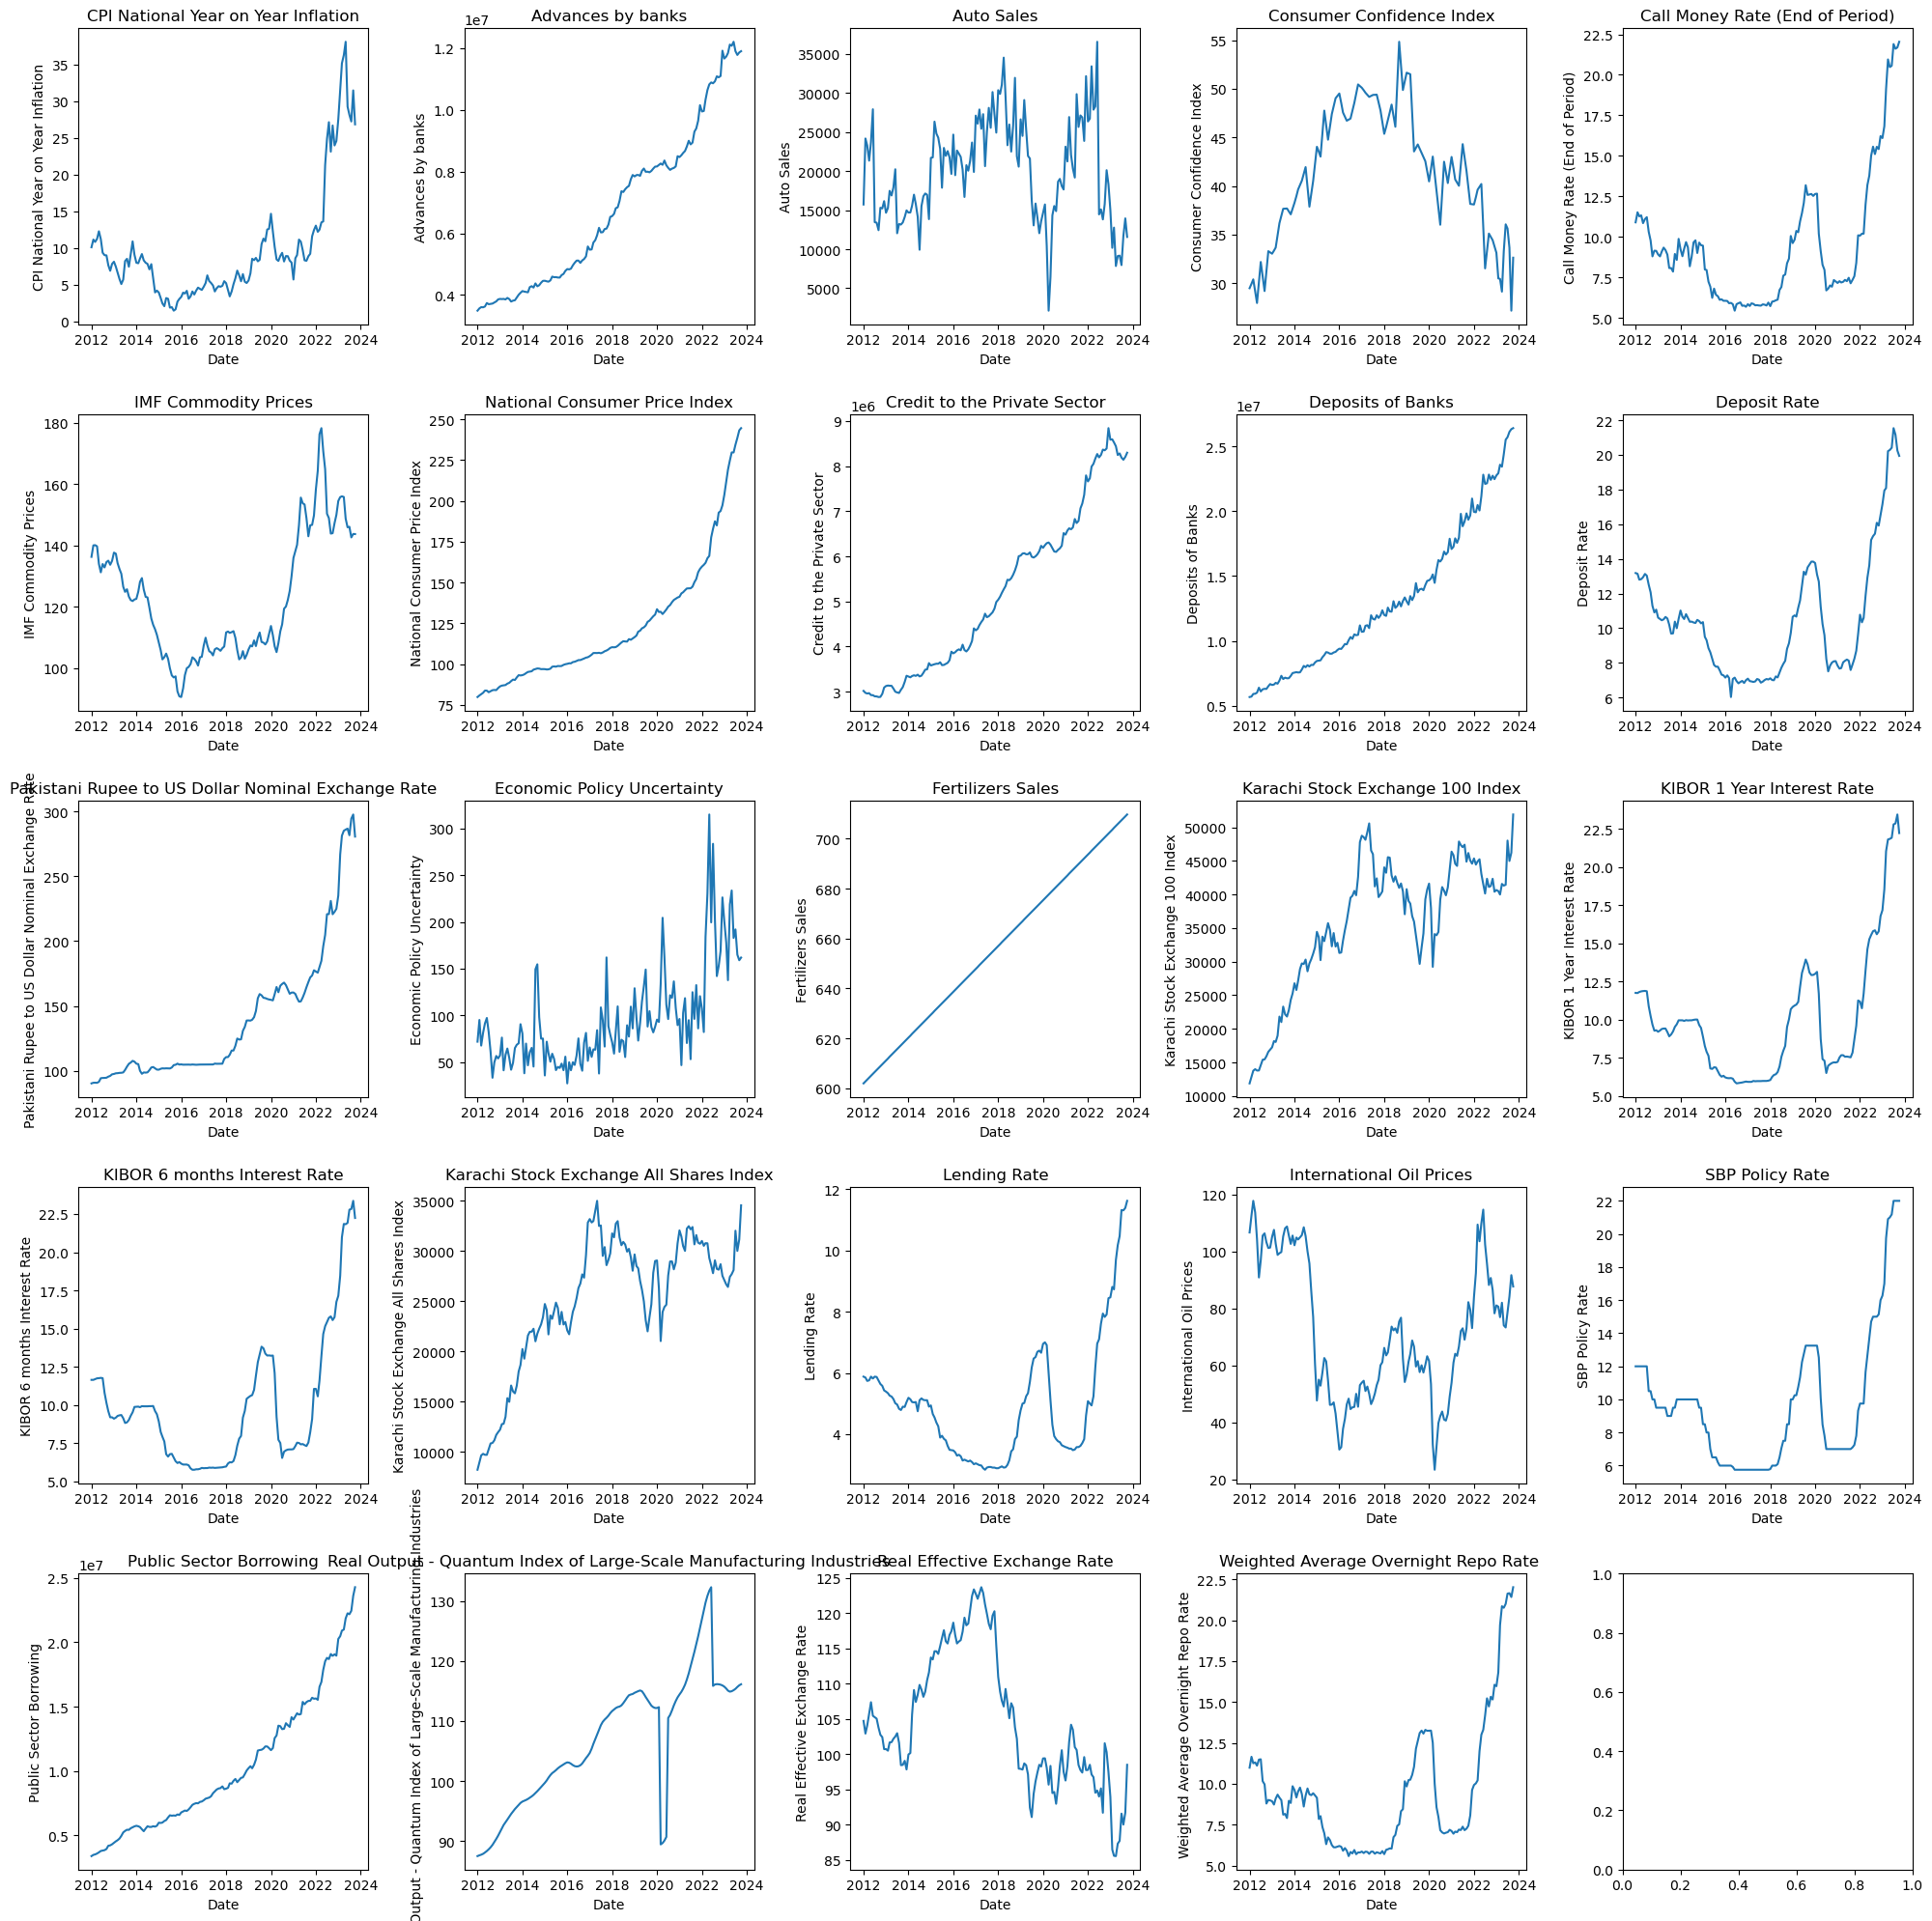

In [90]:
# Subplots for visualizing all columns
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()  # Flatten for easy indexing

for i, column in enumerate(columns_to_plot):
    axes[i].plot(data['Date'], data[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.savefig('mega_plot.png', bbox_inches='tight', dpi=700)  # Save image
plt.show()

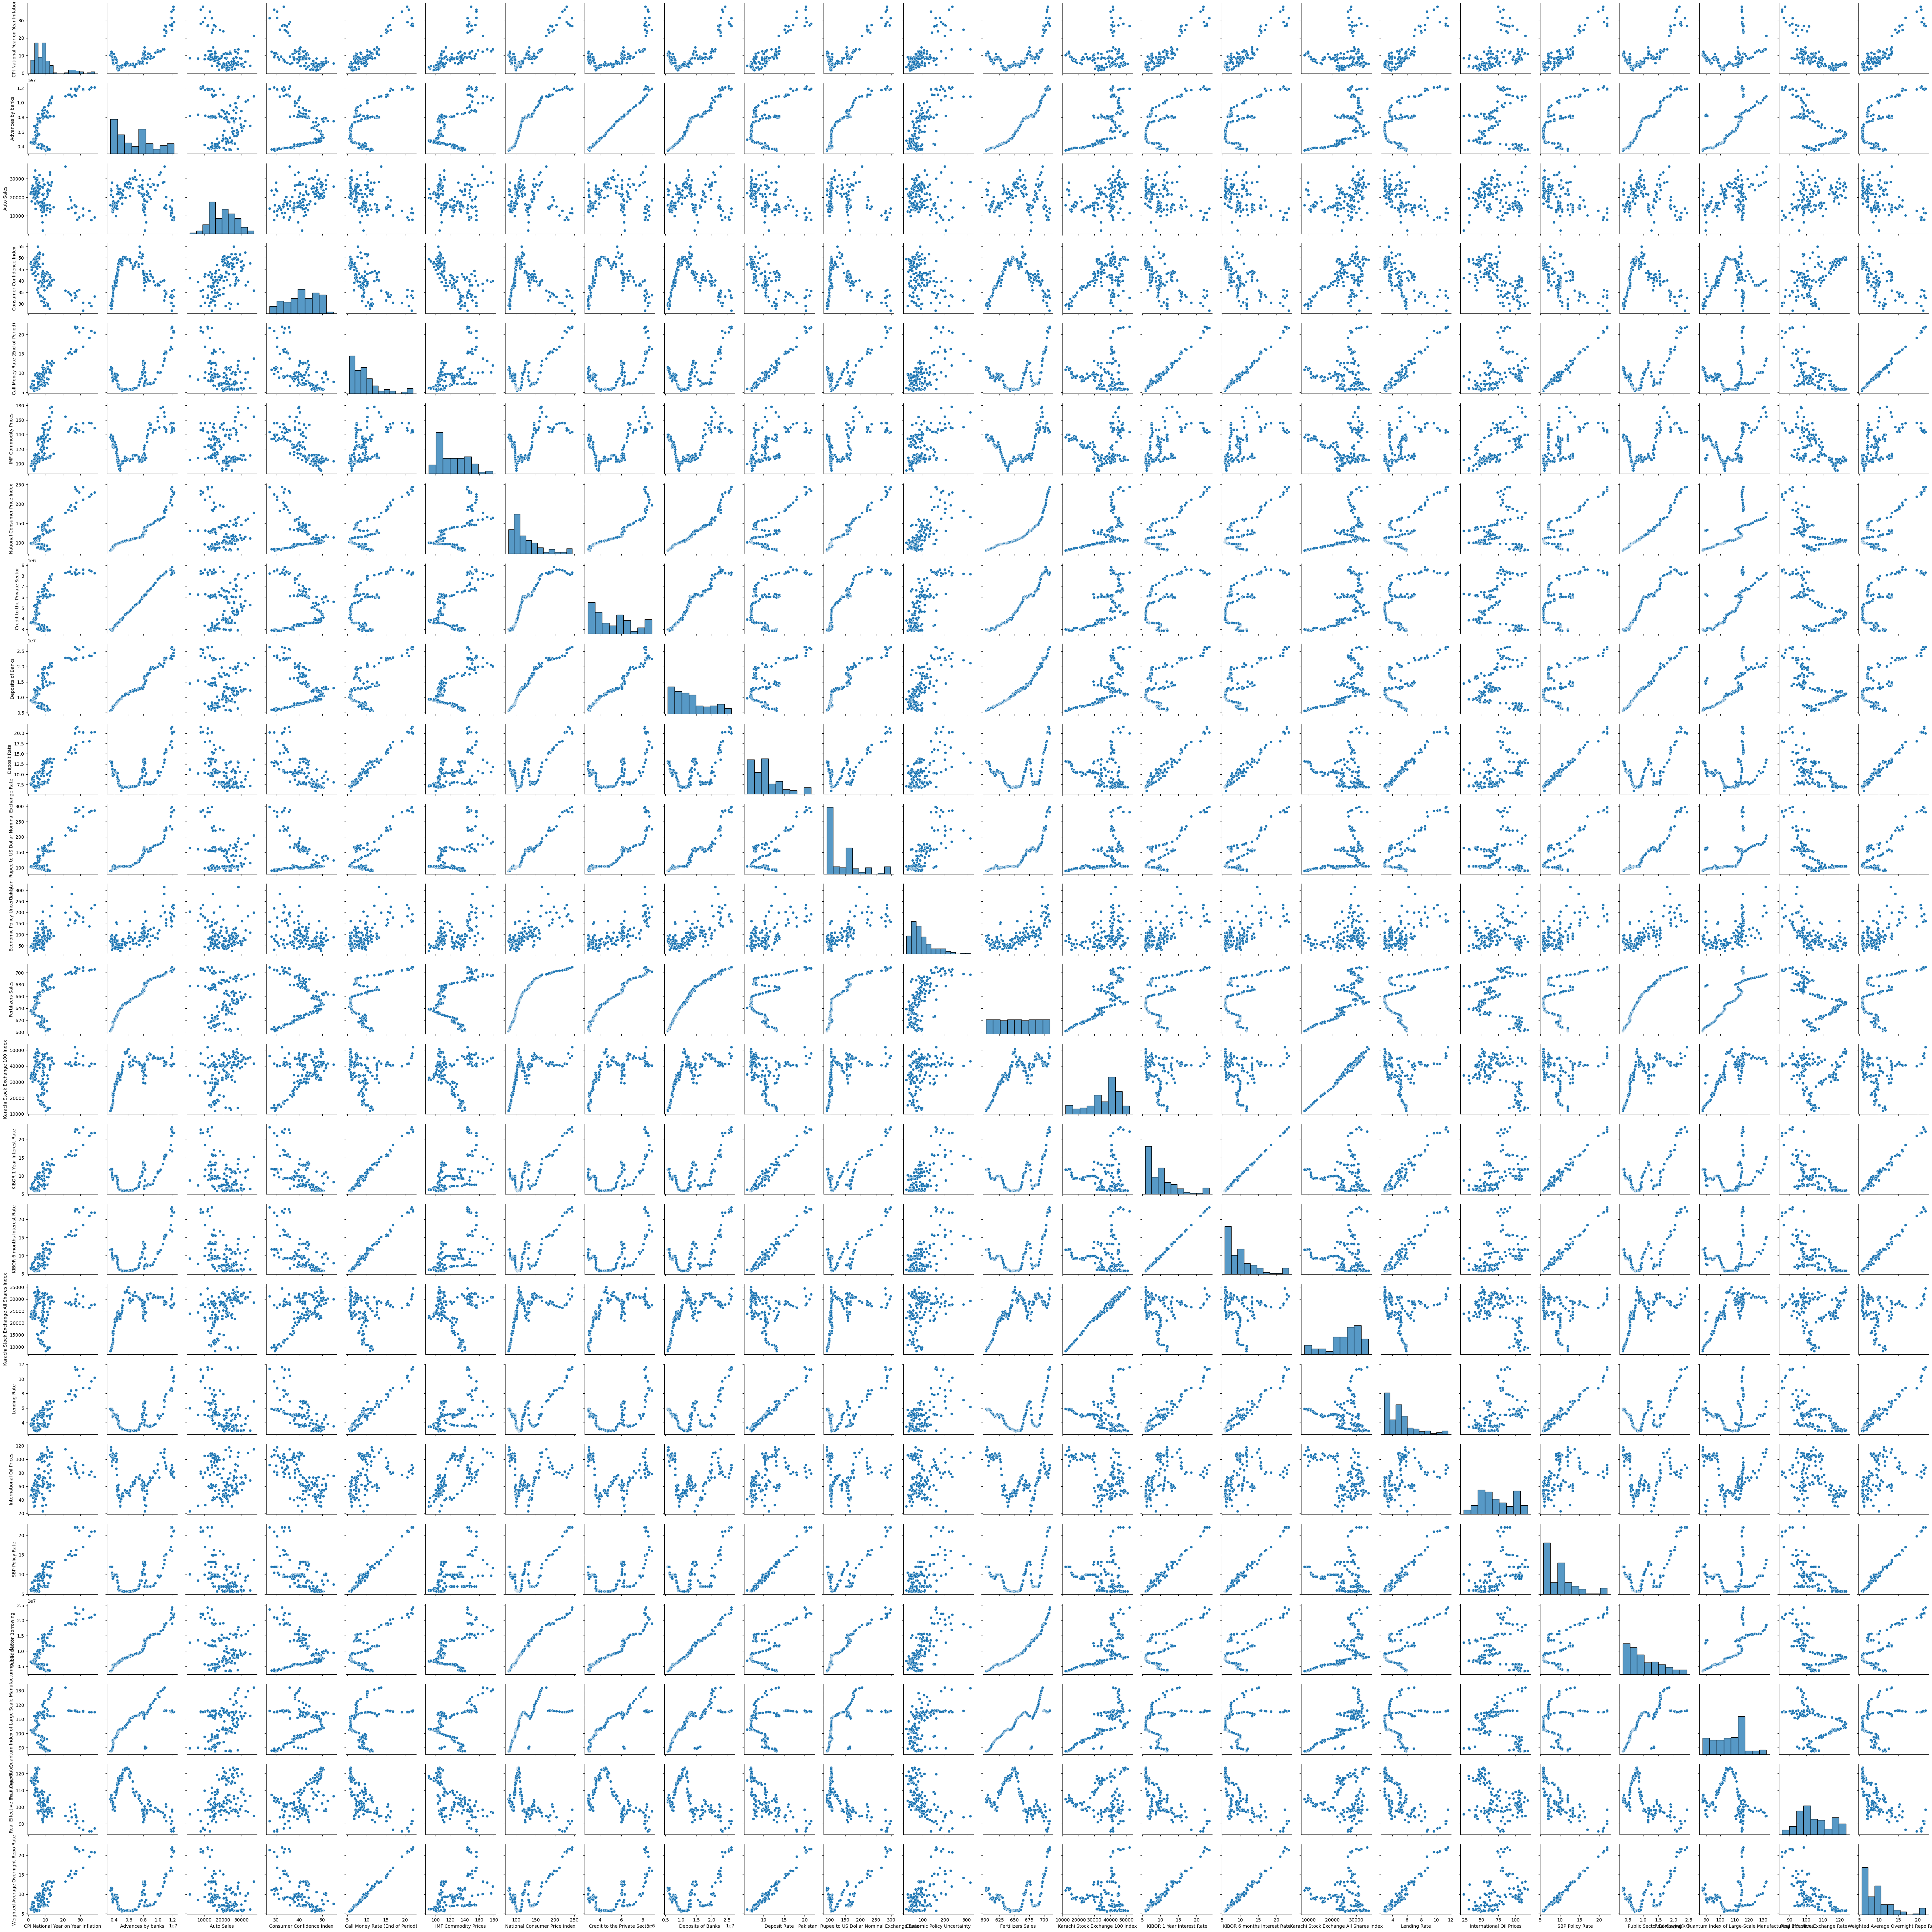

In [91]:
#Pair Plot
data.set_index('Date')  # Date as index
sns.pairplot(data)
plt.savefig('pair_plot_all_features.png', bbox_inches='tight', dpi=400)
plt.show()


Scaling

In [92]:
#Robust Scaling
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler_robust = RobustScaler()
data_robust_scaled = scaler_robust.fit_transform(data[numeric_columns])

data_robust_scaled_df = pd.DataFrame(data_robust_scaled, columns=numeric_columns)

date_column = data.iloc[:, 0]  # Extract the Date column

# Combine Date column with scaled data
data_final = pd.concat([date_column, data_robust_scaled_df], axis=1)

data_final.to_csv('data final.csv', index=False)

In [93]:
# Fit the Robust Scaler
scaler_robust = RobustScaler()
scaler_robust.fit(data_final[numeric_columns])

# Extract median and IQR
median = scaler_robust.center_
iqr = scaler_robust.scale_ * 1.349  # IQR is the scale multiplied by 1.349

print(median)
print(iqr)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.46511014e-16
  0.00000000e+00  0.00000000e+00  1.65666092e-16  1.70002901e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.19479079e-16
 -1.05514555e-15  2.94902991e-16  0.00000000e+00  1.81061763e-16
  0.00000000e+00  1.97975317e-16 -1.63280847e-16  0.00000000e+00
 -1.18394877e-16  4.23272528e-16 -4.69242700e-16  2.06432094e-16]
[1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349
 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349 1.349]


In [94]:
data_final.head()

Date  CPI National Year on Year Inflation  Advances by banks  \
0 2012-01-01                             0.327808          -0.747287   
1 2012-02-01                             0.503889          -0.728202   
2 2012-03-01                             0.451036          -0.717988   
3 2012-04-01                             0.520625          -0.719199   
4 2012-05-01                             0.694350          -0.712866   

   Auto Sales  Consumer Confidence Index  Call Money Rate (End of Period)  \
0   -0.446074                  -1.175079                         0.525792   
1    0.405848                  -1.130700                         0.679925   
2    0.316522                  -1.086320                         0.617775   
3    0.120025                  -1.204828                         0.632691   
4    0.359572                  -1.323336                         0.513362   

   IMF Commodity Prices  National Consumer Price Index  \
0              0.580130                      -0.691034   
1              0.697565                      -0.668649   
2              0.699757                      -0.650461   
3              0.687857                      -0.630640   
4              0.508416                      -0.599161   

   Credit to the Private Sector  Deposits of Banks  ...  \
0                     -0.697111          -0.740755  ...   
1                     -0.713378          -0.736680  ...   
2                     -0.718283          -0.712771  ...   
3                     -0.715625          -0.710955  ...   
4                     -0.731292          -0.700899  ...   

   KIBOR 1 Year Interest Rate  KIBOR 6 months Interest Rate  \
0                    0.499492                      0.501529   
1                    0.497462                      0.501529   
2                    0.511675                      0.511723   
3                    0.519797                      0.521916   
4                    0.523858                      0.523955   

   Karachi Stock Exchange All Shares Index  Lending Rate  \
0                                -2.282986      0.438753   
1                                -2.196387      0.425390   
2                                -2.111874      0.376392   
3                                -2.092316      0.385301   
4                                -2.104138      0.438753   

   International Oil Prices  SBP Policy Rate  Public Sector Borrowing  \
0                  0.869900         0.492854                -0.669039   
1                  1.007815         0.492854                -0.657022   
2                  1.125503         0.492854                -0.652230   
3                  1.031950         0.492854                -0.643524   
4                  0.815424         0.492854                -0.632230   

   Real Output - Quantum Index of Large-Scale Manufacturing Industries  \
0                                          -1.316222                     
1                                          -1.308338                     
2                                          -1.302353                     
3                                          -1.293524                     
4                                          -1.280576                     

   Real Effective Exchange Rate  Weighted Average Overnight Repo Rate   
0                      0.160192                               0.505890  
1                      0.041153                               0.661549  
2                      0.117052                               0.569097  
3                      0.227470                               0.581627  
4                      0.335355                               0.535381  

[5 rows x 25 columns]

Post-Scaling Comparison Plot

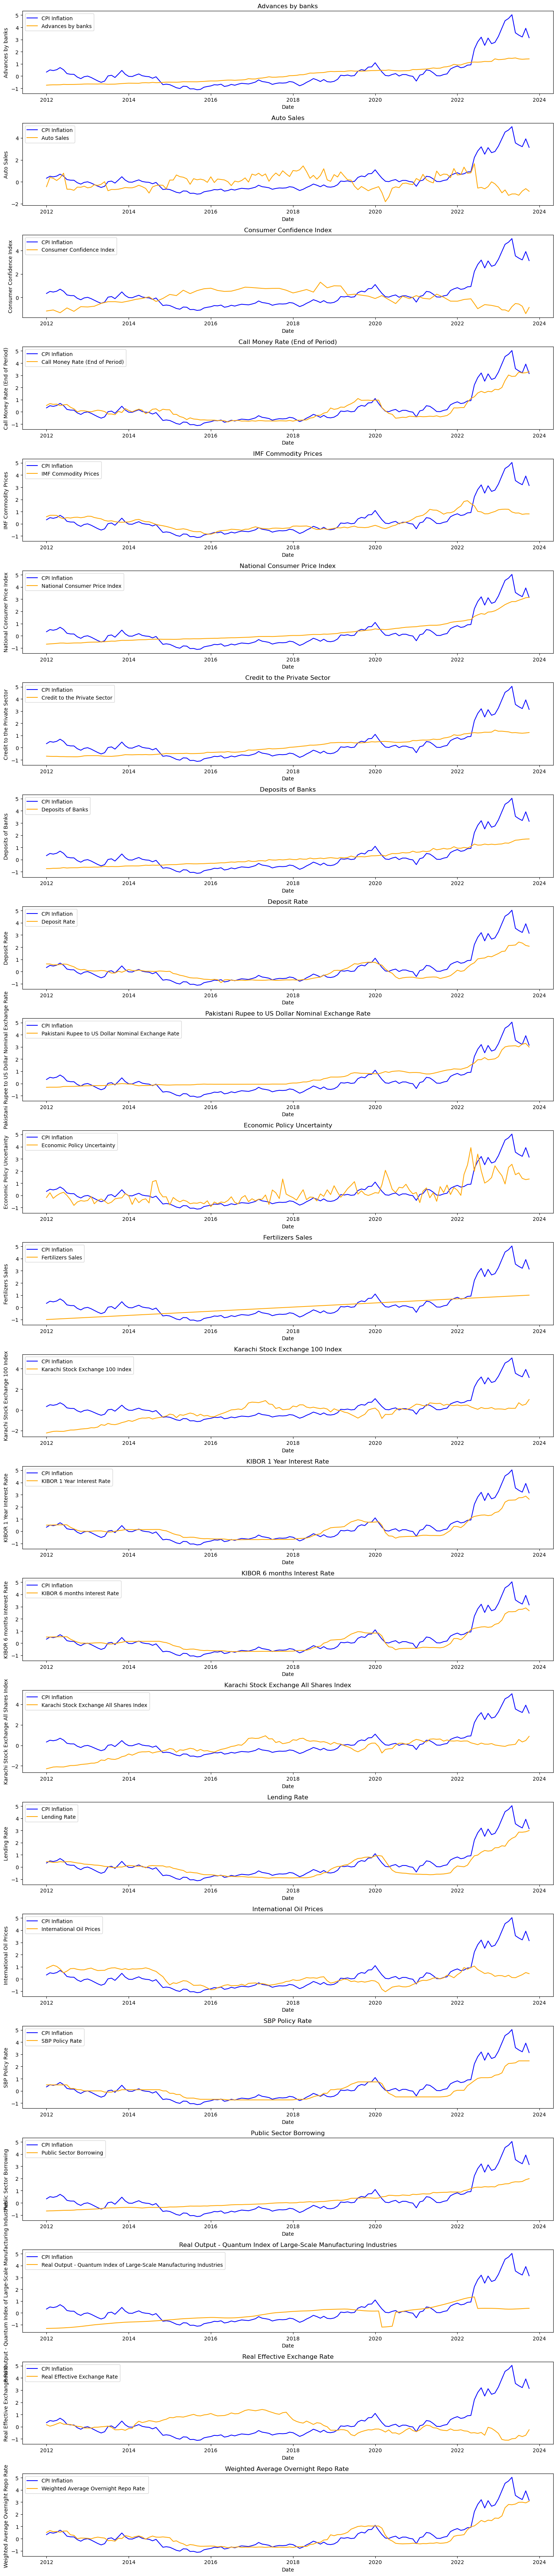

In [95]:
num_features = len(columns_to_plot) - 1  # Excluding 'CPI National Year on Year Inflation'
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(15, 3 * num_features))
axes = axes.flatten()

axis_index = 0

# Plot inflation against each feature in vertical stack
for column in columns_to_plot:
    if column != 'CPI National Year on Year Inflation':
        axes[axis_index].plot(data_final['Date'], data_final['CPI National Year on Year Inflation'], label='CPI Inflation', color='blue')
        axes[axis_index].plot(data_final['Date'], data_final[column], label=column, color='orange')
        axes[axis_index].set_title(column)
        axes[axis_index].set_xlabel('Date')
        axes[axis_index].set_ylabel(column)
        axes[axis_index].legend()
        axis_index += 1  # Move to the next axis

plt.tight_layout()
plt.savefig('inflation_with_other_features_vertical.png', bbox_inches='tight', dpi=700)
plt.show()

Correlation Matrix for Analysis

In [96]:
correlation_matrix = data_final.corr()

correlation_df = correlation_matrix.reset_index()

print("Full Correlation Matrix:")
print(correlation_df)
correlation_df.to_csv('correlation_matrix.csv', index=False)

Full Correlation Matrix:
                                                index      Date  \
0                                                Date  1.000000   
1                 CPI National Year on Year Inflation  0.603017   
2                                   Advances by banks  0.974914   
3                                          Auto Sales  0.036645   
4                           Consumer Confidence Index  0.014757   
5                     Call Money Rate (End of Period)  0.461505   
6                                IMF Commodity Prices  0.394833   
7                       National Consumer Price Index  0.892593   
8                        Credit to the Private Sector  0.978526   
9                                   Deposits of Banks  0.968122   
10                                       Deposit Rate  0.356620   
11  Pakistani Rupee to US Dollar Nominal Exchange ...  0.863029   
12                        Economic Policy Uncertainty  0.673248   
13                                  F

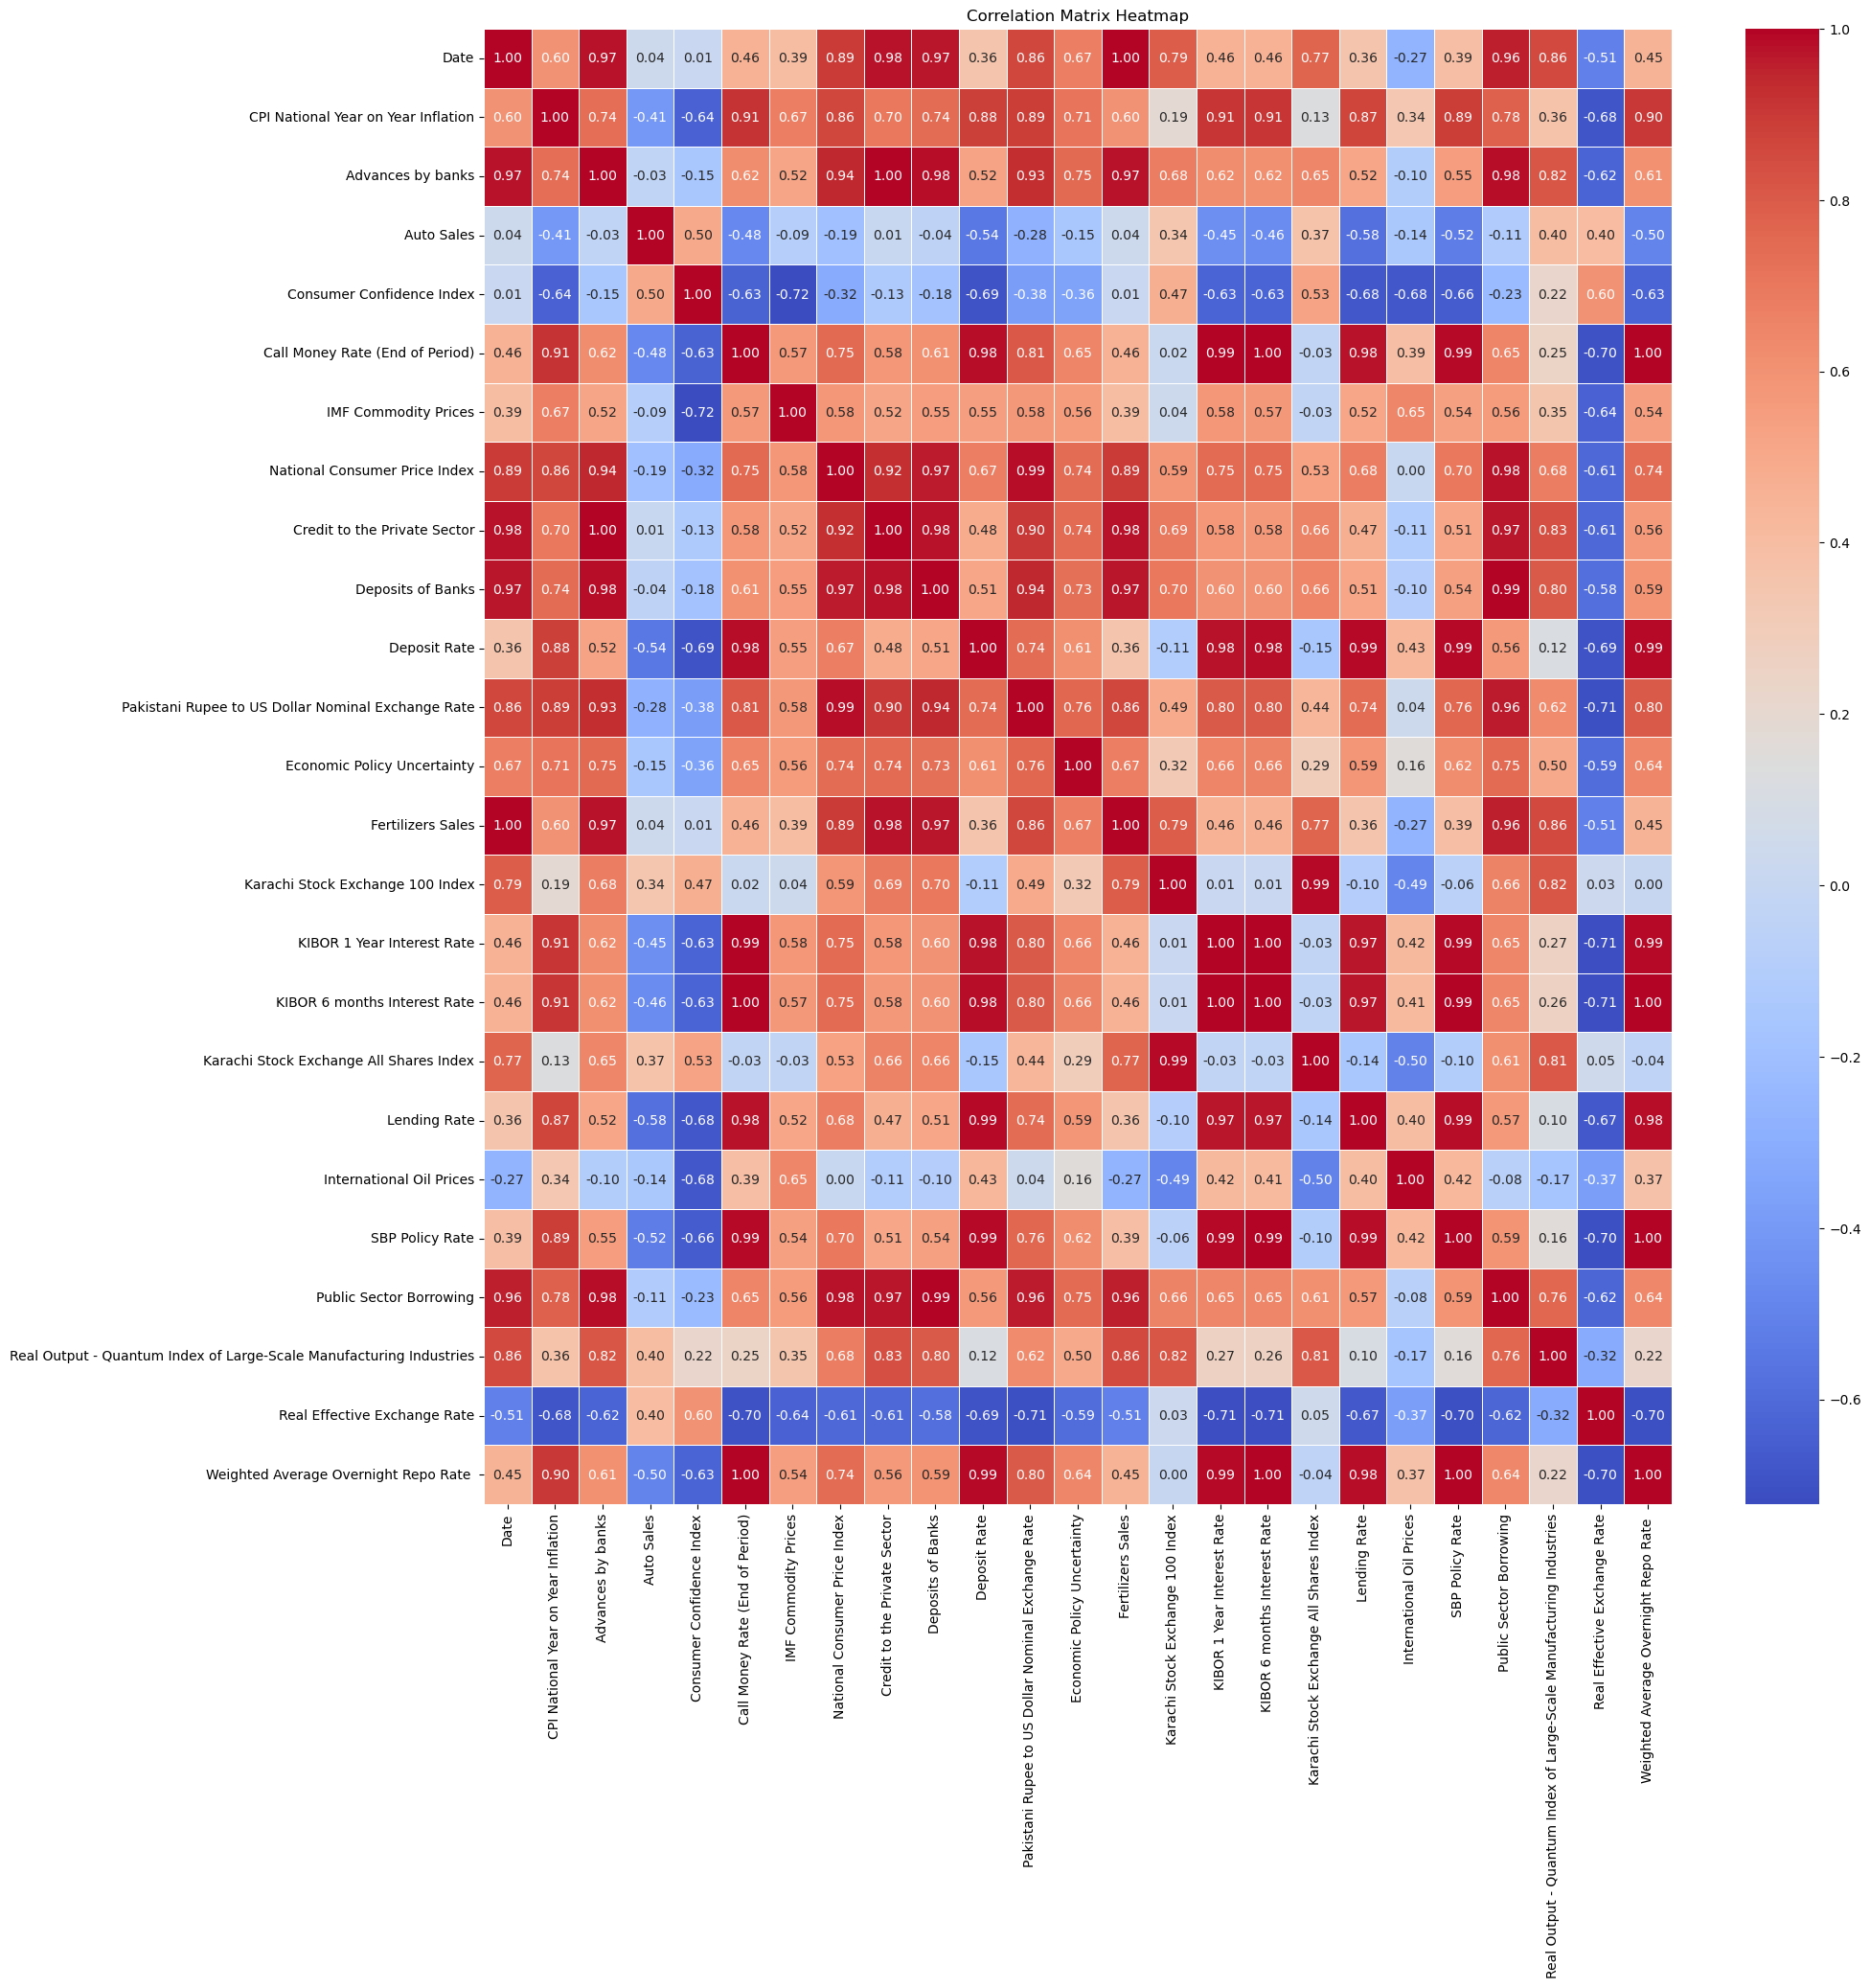

In [97]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('full_correlation_heatmap.png', bbox_inches='tight', dpi=900)
plt.show()

In [98]:
# Threshold for multicollinearity
threshold = 0.8

# Pairs with multicollinearity
multicollinear_pairs_filtered = []

# Loop to find highly correlated feature pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # only upper triangle
        corr_value = correlation_matrix.iloc[i, j]
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        
        # Exclude pairs with 'Date' or 'CPI National Year on Year Inflation'
        if abs(corr_value) >= threshold and feature1 != 'Date' and feature2 != 'Date' and feature1 != 'CPI National Year on Year Inflation' and feature2 != 'CPI National Year on Year Inflation':
            multicollinear_pairs_filtered.append((feature1, feature2, corr_value))

print("Highly Correlated Feature Pairs (Excluding Date and CPI Inflation):")
for pair in multicollinear_pairs_filtered:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

multicollinear_filtered_df = pd.DataFrame(multicollinear_pairs_filtered, columns=['Feature 1', 'Feature 2', 'Correlation'])
multicollinear_filtered_df.to_csv('filtered_multicollinear_pairs.csv', index=False)


Highly Correlated Feature Pairs (Excluding Date and CPI Inflation):
Advances by banks and National Consumer Price Index: correlation = 0.94
Advances by banks and Credit to the Private Sector: correlation = 1.00
Advances by banks and Deposits of Banks: correlation = 0.98
Advances by banks and Pakistani Rupee to US Dollar Nominal Exchange Rate: correlation = 0.93
Advances by banks and Fertilizers Sales: correlation = 0.97
Advances by banks and Public Sector Borrowing: correlation = 0.98
Advances by banks and Real Output - Quantum Index of Large-Scale Manufacturing Industries: correlation = 0.82
Call Money Rate (End of Period) and Deposit Rate: correlation = 0.98
Call Money Rate (End of Period) and Pakistani Rupee to US Dollar Nominal Exchange Rate: correlation = 0.81
Call Money Rate (End of Period) and KIBOR 1 Year Interest Rate: correlation = 0.99
Call Money Rate (End of Period) and KIBOR 6 months Interest Rate: correlation = 1.00
Call Money Rate (End of Period) and Lending Rate: correl

Transformation

In [99]:
# Feature Engineering
data_final['Interest Rate Spread'] = data_final['KIBOR 1 Year Interest Rate'] - data_final['KIBOR 6 months Interest Rate']
data_final['Exchange Rate Differential'] = data_final['Real Effective Exchange Rate'] - data_final['Pakistani Rupee to US Dollar Nominal Exchange Rate']
data_final['Inflation Expectations'] = data_final['Call Money Rate (End of Period)'] - data_final['SBP Policy Rate']
data_final['Banking Activity Index'] = data_final['Advances by banks'] + data_final['Public Sector Borrowing'] - data_final['Deposits of Banks']
data_final['Stock Market Volatility'] = data_final['Karachi Stock Exchange 100 Index'].pct_change()
data_final['Commodity Price Index'] = data_final['IMF Commodity Prices'] / data_final['International Oil Prices']

# Feature Selection
columns_to_drop = [
    'Credit to the Private Sector',
    'Deposits of Banks',
    'Fertilizers Sales',
    'KIBOR 6 months Interest Rate',
    'Weighted Average Overnight Repo Rate ',
    'Karachi Stock Exchange All Shares Index'
]

data_final_cleaned = data_final.drop(columns=columns_to_drop)
data_final_cleaned.to_csv('data_final_cleaned.csv', index=False)

In [100]:
data_final_cleaned.head()

Date  CPI National Year on Year Inflation  Advances by banks  \
0 2012-01-01                             0.327808          -0.747287   
1 2012-02-01                             0.503889          -0.728202   
2 2012-03-01                             0.451036          -0.717988   
3 2012-04-01                             0.520625          -0.719199   
4 2012-05-01                             0.694350          -0.712866   

   Auto Sales  Consumer Confidence Index  Call Money Rate (End of Period)  \
0   -0.446074                  -1.175079                         0.525792   
1    0.405848                  -1.130700                         0.679925   
2    0.316522                  -1.086320                         0.617775   
3    0.120025                  -1.204828                         0.632691   
4    0.359572                  -1.323336                         0.513362   

   IMF Commodity Prices  National Consumer Price Index  Deposit Rate  \
0              0.580130                      -0.691034      0.626273   
1              0.697565                      -0.668649      0.617694   
2              0.699757                      -0.650461      0.544772   
3              0.687857                      -0.630640      0.551206   
4              0.508416                      -0.599161      0.574799   

   Pakistani Rupee to US Dollar Nominal Exchange Rate  ...  SBP Policy Rate  \
0                                          -0.314642   ...         0.492854   
1                                          -0.306552   ...         0.492854   
2                                          -0.305626   ...         0.492854   
3                                          -0.306929   ...         0.492854   
4                                          -0.293727   ...         0.492854   

   Public Sector Borrowing  \
0                -0.669039   
1                -0.657022   
2                -0.652230   
3                -0.643524   
4                -0.632230   

   Real Output - Quantum Index of Large-Scale Manufacturing Industries  \
0                                          -1.316222                     
1                                          -1.308338                     
2                                          -1.302353                     
3                                          -1.293524                     
4                                          -1.280576                     

   Real Effective Exchange Rate  Interest Rate Spread  \
0                      0.160192             -0.002037   
1                      0.041153             -0.004067   
2                      0.117052             -0.000048   
3                      0.227470             -0.002119   
4                      0.335355             -0.000097   

   Exchange Rate Differential  Inflation Expectations  Banking Activity Index  \
0                    0.474834                0.032939               -0.675572   
1                    0.347705                0.187072               -0.648543   
2                    0.422678                0.124921               -0.657447   
3                    0.534399                0.139837               -0.651768   
4                    0.629082                0.020509               -0.644197   

   Stock Market Volatility  Commodity Price Index  
0                      NaN               0.666893  
1                -0.036428               0.692156  
2                -0.033316               0.621729  
3                -0.008914               0.666560  
4                 0.008016               0.623500  

[5 rows x 25 columns]

Train/Test Split

In [101]:
train = data_final_cleaned.loc[data_final_cleaned['Date'] <= '10/01/2022']
test = data_final_cleaned.loc[data_final_cleaned['Date'] > '10/01/2022']

In [102]:
train.tail()

Date  CPI National Year on Year Inflation  Advances by banks  \
125 2022-06-01                             2.210639           1.149522   
126 2022-07-01                             2.809050           1.142348   
127 2022-08-01                             3.192384           1.158807   
128 2022-09-01                             2.517872           1.200377   
129 2022-10-01                             3.116571           1.192134   

     Auto Sales  Consumer Confidence Index  Call Money Rate (End of Period)  \
125    1.654594                  -0.552792                         1.241765   
126   -0.574014                  -0.976103                         1.547545   
127   -0.509288                  -0.801512                         1.686762   
128   -0.638336                  -0.626920                         1.572405   
129   -0.439521                  -0.660083                         1.684276   

     IMF Commodity Prices  National Consumer Price Index  Deposit Rate  \
125              1.475456                       1.589250      0.722788   
126              1.021373                       1.711438      1.035925   
127              0.976278                       1.818701      1.083110   
128              0.817819                       1.759939      1.113137   
129              0.822203                       1.942054      1.248257   

     Pakistani Rupee to US Dollar Nominal Exchange Rate  ...  SBP Policy Rate  \
125                                           1.672608   ...         0.837851   
126                                           1.950550   ...         1.025136   
127                                           1.952085   ...         1.084278   
128                                           2.127416   ...         1.084278   
129                                           1.949904   ...         1.084278   

     Public Sector Borrowing  \
125                 1.253397   
126                 1.287128   
127                 1.274916   
128                 1.324720   
129                 1.307159   

     Real Output - Quantum Index of Large-Scale Manufacturing Industries  \
125                                           1.352879                     
126                                           0.373238                     
127                                           0.387171                     
128                                           0.390776                     
129                                           0.389301                     

     Real Effective Exchange Rate  Interest Rate Spread  \
125                     -0.493071             -0.002912   
126                     -0.549335             -0.001105   
127                     -0.472820             -0.007428   
128                     -0.701246             -0.013594   
129                     -0.049483             -0.017457   

     Exchange Rate Differential  Inflation Expectations  \
125                   -2.165680                0.403914   
126                   -2.499884                0.522410   
127                   -2.424906                0.602484   
128                   -2.828662                0.488127   
129                   -1.999387                0.599998   

     Banking Activity Index  Stock Market Volatility  Commodity Price Index  
125                1.129225                -0.418899               1.399231  
126                1.239137                -0.652016               1.321089  
127                1.237411                 2.965692               1.583926  
128                1.250172                -0.415401               1.835399  
129                1.272319                 0.079050               1.635197  

[5 rows x 25 columns]

In [103]:
test.head()

Date  CPI National Year on Year Inflation  Advances by banks  \
130 2022-11-01                             2.659581           1.202483   
131 2022-12-01                             2.763105           1.413059   
132 2023-01-01                             3.258886           1.348017   
133 2023-02-01                             3.936922           1.364300   
134 2023-03-01                             4.540525           1.393110   

     Auto Sales  Consumer Confidence Index  Call Money Rate (End of Period)  \
130   -0.003377                  -0.693246                         1.649472   
131   -0.184852                  -0.756645                         1.848353   
132   -0.518866                  -0.820044                         1.818521   
133   -1.005520                  -1.076567                         2.000000   
134   -0.744297                  -1.081444                         2.569298   

     IMF Commodity Prices  National Consumer Price Index  Deposit Rate  \
130              0.924920                       1.965839      1.213941   
131              1.009473                       2.046986      1.346917   
132              1.151648                       2.197855      1.477748   
133              1.190793                       2.381602      1.647185   
134              1.198935                       2.555089      1.677212   

     Pakistani Rupee to US Dollar Nominal Exchange Rate  ...  SBP Policy Rate  \
130                                           1.981844   ...         1.111878   
131                                           2.023138   ...         1.281419   
132                                           2.200502   ...         1.334648   
133                                           2.751706   ...         1.478561   
134                                           3.001039   ...         2.018728   

     Public Sector Borrowing  \
130                 1.322107   
131                 1.308707   
132                 1.473782   
133                 1.500783   
134                 1.555865   

     Real Output - Quantum Index of Large-Scale Manufacturing Industries  \
130                                           0.385141                     
131                                           0.377855                     
132                                           0.365628                     
133                                           0.346936                     
134                                           0.326449                     

     Real Effective Exchange Rate  Interest Rate Spread  \
130                     -0.132576             -0.017614   
131                     -0.320354             -0.018442   
132                     -0.552521             -0.020803   
133                     -1.046574             -0.009705   
134                     -1.105026             -0.015852   

     Exchange Rate Differential  Inflation Expectations  \
130                   -2.114420                0.537594   
131                   -2.343492                0.566934   
132                   -2.753023                0.483873   
133                   -3.798281                0.521439   
134                   -4.106065                0.550569   

     Banking Activity Index  Stock Market Volatility  Commodity Price Index  
130                1.260017                 0.583876               2.276585  
131                1.488372                -0.655761               4.649775  
132                1.554602                 0.249568               4.101715  
133                1.578241                -0.128629               4.395881  
134                1.584716                -0.462331               6.443444  

[5 rows x 25 columns]

In [104]:
print(train.shape)
print(test.shape)

(130, 25)
(12, 25)


In [105]:
# Extract Year, Month, and Day from the 'Date' column
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
# Optionally drop the original 'Date' column
train = train.drop(columns=['Date'])


In [106]:
# Extract Year, Month, and Day from the 'Date' column
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
# Optionally drop the original 'Date' column
test = test.drop(columns=['Date'])


In [107]:
# Split the data into features (X) and target (y)
X_train = train.drop(columns=['CPI National Year on Year Inflation'])
y_train = train['CPI National Year on Year Inflation']

X_test = test.drop(columns=['CPI National Year on Year Inflation'])
y_test = test['CPI National Year on Year Inflation']

# Save the datasets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data saved successfully: X_train, X_test, y_train, y_test.")


Data saved successfully: X_train, X_test, y_train, y_test.


In [108]:
# Load the datasets from CSV files (preventing data leaks)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Verify the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (130, 26)
X_test shape: (12, 26)
y_train shape: (130, 1)
y_test shape: (12, 1)


In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Advances by banks                                                    130 non-null    float64
 1   Auto Sales                                                           130 non-null    float64
 2   Consumer Confidence Index                                            130 non-null    float64
 3   Call Money Rate (End of Period)                                      130 non-null    float64
 4   IMF Commodity Prices                                                 130 non-null    float64
 5   National Consumer Price Index                                        130 non-null    float64
 6   Deposit Rate                                                         130 non-null    float64
 7   Pakistan

In [110]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 26 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Advances by banks                                                    12 non-null     float64
 1   Auto Sales                                                           12 non-null     float64
 2   Consumer Confidence Index                                            12 non-null     float64
 3   Call Money Rate (End of Period)                                      12 non-null     float64
 4   IMF Commodity Prices                                                 12 non-null     float64
 5   National Consumer Price Index                                        12 non-null     float64
 6   Deposit Rate                                                         12 non-null     float64
 7   Pakistani 

Model Building

Random Forest

In [111]:
# Parameter grid for RF
param_grid_rf = {
    'n_estimators': [40, 45, 50, 55],
    'max_depth': [6, 8, 10, 12, 14],
    'min_samples_split': [1, 2 , 3],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'random_state': [42],
}

rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV for RF
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              verbose=2)

# Fit model
grid_search_rf.fit(X_train, y_train.values.ravel())
print("Best Random Forest Params:", grid_search_rf.best_params_)
print("Best Random Forest Score (negative MSE):", grid_search_rf.best_score_)

# Predict
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Optimized Random Forest RMSE: {rmse_rf}")

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Random Forest Params: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 45, 'oob_score': False, 'random_state': 42}
Best Random Forest Score (negative MSE): -0.26397983642327383
Optimized Random Forest RMSE: 0.993187358271681


XGBoost

In [112]:
# Parameter grid for XGB
param_grid_xgb = {
    'n_estimators': [100, 110, 120, 130],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.3, 0.4, 0.5],
    'subsample': [0.25, 0.5],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3],
    'reg_alpha': [0.5, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.5],
    'random_state': [42]
}

xgb_model = xgb.XGBRegressor(random_state=42)

# GridSearchCV for XGB
grid_search_xgb = GridSearchCV(estimator=xgb_model,
                                param_grid=param_grid_xgb,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1,
                                verbose=2)

# Fit model
grid_search_xgb.fit(X_train, y_train.values.ravel())
print("Best XGBoost Params:", grid_search_xgb.best_params_)
print("Best XGBoost Score (negative MSE):", grid_search_xgb.best_score_)

# Predict
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"XGBoost RMSE on Test Set: {rmse_xgb}")

Fitting 5 folds for each of 23328 candidates, totalling 116640 fits
Best XGBoost Params: {'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.4, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 130, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.25}
Best XGBoost Score (negative MSE): -0.21877428032950555
XGBoost RMSE on Test Set: 1.1189199796917433


Weighted Average Ensemble

In [113]:
# Assign weights inversely proportional to RMSE
weight_rf = 1 / rmse_rf
weight_xgb = 1 / rmse_xgb
total_weight = weight_rf + weight_xgb

# Weighted averaging
y_pred_weighted = (weight_rf * y_pred_rf + weight_xgb * y_pred_xgb) / total_weight

# Ensemble RMSE
rmse_weighted = mean_squared_error(y_test, y_pred_weighted, squared=False)
print(f"Weighted Ensemble RMSE: {rmse_weighted}")

Weighted Ensemble RMSE: 1.0479670314038163


Models Evaluation

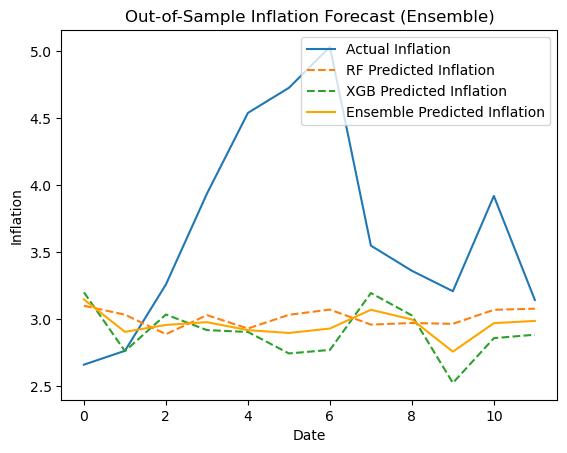

In [114]:
# Plot actual vs predicted inflation for the ensemble model
plt.plot(y_test.index, y_test, label='Actual Inflation')
plt.plot(y_test.index, y_pred_rf, label='RF Predicted Inflation', linestyle='--')
plt.plot(y_test.index, y_pred_xgb, label='XGB Predicted Inflation', linestyle='--')
plt.plot(y_test.index, y_pred_weighted, label='Ensemble Predicted Inflation', color='orange')
plt.legend()
plt.title("Out-of-Sample Inflation Forecast (Ensemble)")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.show()

Save Models

In [115]:
# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_rf_model.joblib')

# Save the best XGBoost model
joblib.dump(best_xgb_model, 'best_xgb_model.joblib')

# Save the ensemble weights and model predictions
ensemble_data = {
    'weight_rf': weight_rf,
    'weight_xgb': weight_xgb,
    'y_pred_weighted': y_pred_weighted
}

joblib.dump(ensemble_data, 'ensemble_data.joblib')


['ensemble_data.joblib']

In [116]:
class EnsembleModel:
    def __init__(self, rf_model, xgb_model, weight_rf, weight_xgb):
        self.rf_model = rf_model
        self.xgb_model = xgb_model
        self.weight_rf = weight_rf
        self.weight_xgb = weight_xgb

    def predict(self, X):
        # Predict with each model
        rf_pred = self.rf_model.predict(X)
        xgb_pred = self.xgb_model.predict(X)
        
        # Apply ensemble weights
        y_pred_weighted = (self.weight_rf * rf_pred) + (self.weight_xgb * xgb_pred)
        return y_pred_weighted

# Instantiate EnsembleModel with trained models and weights
ensemble_model = EnsembleModel(best_rf_model, best_xgb_model, weight_rf, weight_xgb)

# Save the ensemble model
joblib.dump(ensemble_model, 'ensemble_model.joblib')

['ensemble_model.joblib']

Load Models for Deployment

In [117]:
# Load the saved models
best_rf_model = joblib.load('best_rf_model.joblib')
best_xgb_model = joblib.load('best_xgb_model.joblib')
ensemble_model = joblib.load('ensemble_model.joblib')

In [118]:
'''# Extract ensemble weights
weight_rf = ensemble_data['weight_rf']
weight_xgb = ensemble_data['weight_xgb']
total_weight = weight_rf + weight_xgb

# Predict using the loaded models
y_pred_rf = best_rf_model.predict(X_test)
y_pred_xgb = best_xgb_model.predict(X_test)

# Ensemble Prediction using loaded weights
y_pred_ensemble = (weight_rf * y_pred_rf + weight_xgb * y_pred_xgb) / total_weight

# Calculate RMSE for the ensemble (optional)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
print(f"Ensemble RMSE on Test Set: {rmse_ensemble}")'''

'# Extract ensemble weights\nweight_rf = ensemble_data[\'weight_rf\']\nweight_xgb = ensemble_data[\'weight_xgb\']\ntotal_weight = weight_rf + weight_xgb\n\n# Predict using the loaded models\ny_pred_rf = best_rf_model.predict(X_test)\ny_pred_xgb = best_xgb_model.predict(X_test)\n\n# Ensemble Prediction using loaded weights\ny_pred_ensemble = (weight_rf * y_pred_rf + weight_xgb * y_pred_xgb) / total_weight\n\n# Calculate RMSE for the ensemble (optional)\nrmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)\nprint(f"Ensemble RMSE on Test Set: {rmse_ensemble}")'

Forecast

Actual vs Predicted (Table)

In [119]:
# Reshape to ensure they are 1-dimensional
y_test_flat = y_test.values.reshape(-1) if len(y_test.values.shape) > 1 else y_test.values
y_pred_test_flat = y_pred_weighted.reshape(-1) if len(y_pred_weighted.shape) > 1 else y_pred_test

comparison_df = pd.DataFrame({
    'Actual Inflation': y_test_flat,  
    'Predicted Inflation': y_pred_test_flat
})

comparison_df.head(6)


Actual Inflation  Predicted Inflation
0          2.659581             5.980848
1          2.763105             5.520860
2          3.258886             5.618658
3          3.936922             5.658128
4          4.540525             5.544958
5          4.727825             5.504687

Fixed Rolling Window

In [120]:
# Define fixed window size and 12-month forecast
window_size = 100
rmse_fixed = []

for start in range(len(train) - window_size - 12):
    end = start + window_size
    X_train_window = X_train.iloc[start:end]
    y_train_window = y_train.iloc[start:end]
    
    # Train each model on fixed window
    best_rf_model.fit(X_train_window, y_train_window)
    best_xgb_model.fit(X_train_window, y_train_window)
    
    # Forecast next 12 months using ensemble
    y_pred_fixed = ensemble_model.predict(X_test.iloc[:12])
    rmse_fixed.append(mean_squared_error(y_test.iloc[:12], y_pred_fixed, squared=False))

print("Fixed Window Forecast RMSE:", np.mean(rmse_fixed))

Fixed Window Forecast RMSE: 2.1067673900078208


Expanding Window

In [121]:
rmse_expanding = []
start = 0
window_size = 100

while start + window_size <= len(train):
    X_train_window = X_train.iloc[:start + window_size]
    y_train_window = y_train.iloc[:start + window_size]
    
    # Train each base model on the expanding window
    best_rf_model.fit(X_train_window, y_train_window)
    best_xgb_model.fit(X_train_window, y_train_window)
    
    # Forecast the next 12 months using the ensemble
    y_pred_expanding = ensemble_model.predict(X_test.iloc[:12])
    rmse_expanding.append(mean_squared_error(y_test.iloc[:12], y_pred_expanding, squared=False))
    
    start += 1

print("Expanding Window Forecast RMSE:", np.mean(rmse_expanding))

Expanding Window Forecast RMSE: 2.1067673900078203


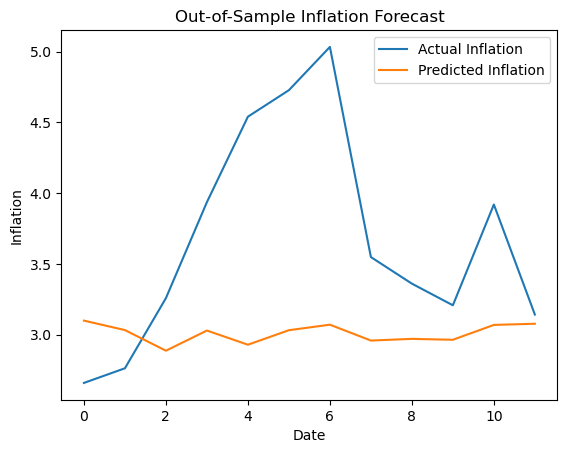

In [122]:
# Plot for Out-of-Sample Forecast
plt.plot(y_test.index, y_test, label='Actual Inflation')
plt.plot(y_test.index, y_pred_rf, label='Predicted Inflation')
plt.legend()
plt.title("Out-of-Sample Inflation Forecast")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.show()

Predicting the Future using Recursive Forecasting

In [123]:
last_known_data = data_final_cleaned.iloc[-1].copy()

if 'Date' in last_known_data:
    last_known_data['Year'] = last_known_data['Date'].year
    last_known_data['Month'] = last_known_data['Date'].month
    last_known_data['Day'] = last_known_data['Date'].day
    last_known_data = last_known_data.drop('Date')

forecast_horizon = 12
forecast = []

for step in range(forecast_horizon):
    # Predict next step using model
    pred = ensemble_model.predict([last_known_data.drop('CPI National Year on Year Inflation')])[0]
    forecast.append(pred)

    # Update data with predictions
    last_known_data['CPI National Year on Year Inflation'] = pred
    last_known_data = last_known_data.shift(-1)  # To simulate "time moving forward"
    last_known_data.iloc[-1] = pred  # Add prediction as last feature


In [124]:
forecast

[5.675704064300724,
 1.5211923051454046,
 1.7045897704067836,
 3.932502845922426,
 2.904961082251482,
 2.4993676810499963,
 3.790883965013002,
 3.8622336222688314,
 3.31954461856394,
 2.1330441185415436,
 3.4692486668249614,
 2.6992084052371963]

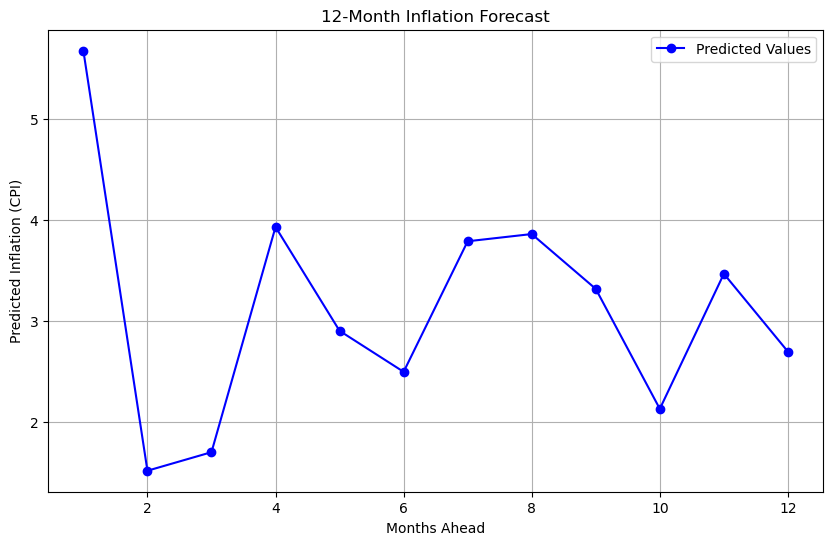

In [125]:
# Plotting Inflation Forecast
months = list(range(1, forecast_horizon + 1))

plt.figure(figsize=(10, 6))
plt.plot(months, forecast, label='Predicted Values', color='blue', marker='o')

plt.xlabel("Months Ahead")
plt.ylabel("Predicted Inflation (CPI)")
plt.title("12-Month Inflation Forecast")
plt.legend()
plt.grid(True)

plt.show()

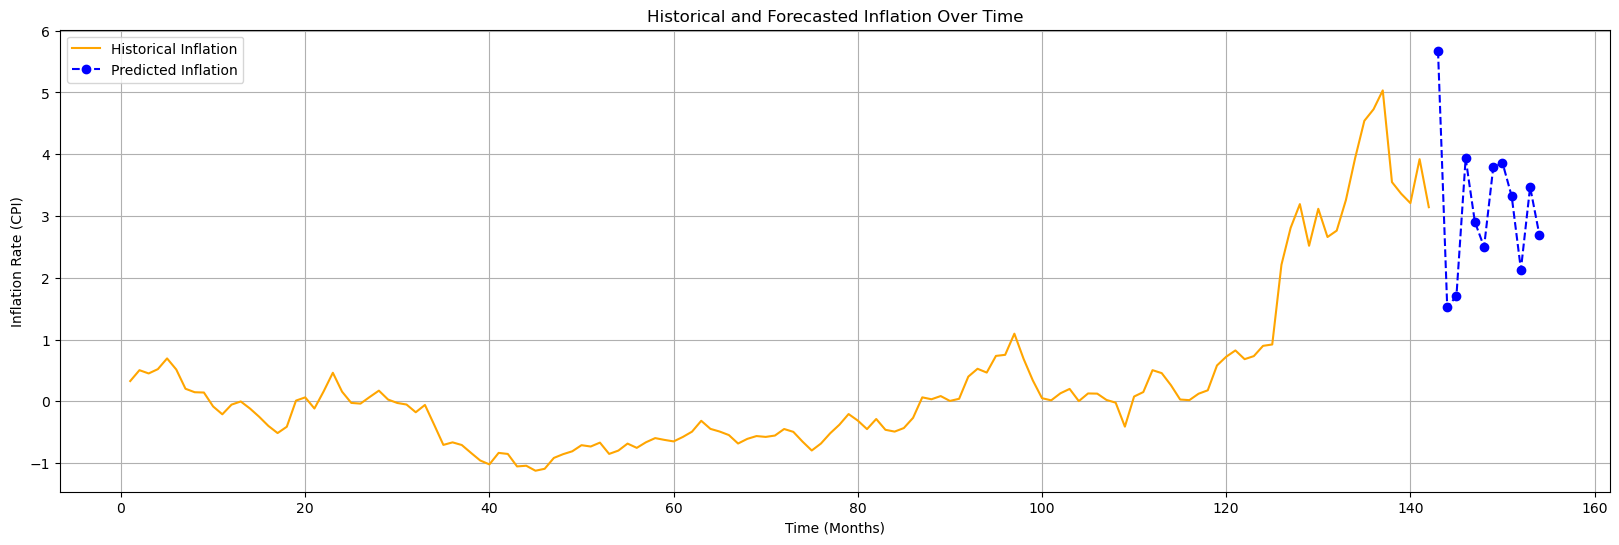

In [126]:
# Combining the historical inflation data with the forecasted values
historical_inflation = data_final_cleaned['CPI National Year on Year Inflation'].tolist()

combined_inflation = historical_inflation + forecast

months = list(range(1, len(combined_inflation) + 1))

plt.figure(figsize=(20, 6))
plt.plot(months[:len(historical_inflation)], historical_inflation, label="Historical Inflation", color='orange')
plt.plot(months[len(historical_inflation):], forecast, label="Predicted Inflation", color='blue', linestyle='--', marker='o')

plt.xlabel("Time (Months)")
plt.ylabel("Inflation Rate (CPI)")
plt.title("Historical and Forecasted Inflation Over Time")
plt.legend()
plt.grid(True)

plt.savefig('historical_and_forecasted_inflation_over_time.png', bbox_inches='tight', dpi=600)
plt.show()


Overall Trend in Next Year Inflation

In [127]:
last_historical_value = historical_inflation[-1]
last_forecast_value = forecast[-1]

percentage_difference = ((last_forecast_value - last_historical_value) / last_historical_value) * 100

print(f"Last Historical Inflation Value: {last_historical_value}")
print(f"Last Forecasted Inflation Value: {last_forecast_value}")
print(f"Percentage Difference: {percentage_difference:.2f}%")


Last Historical Inflation Value: 3.1426127953002365
Last Forecasted Inflation Value: 2.6992084052371963
Percentage Difference: -14.11%
